In [3]:
import numpy as np
from keras.models import Sequential
from keras.layers.core import Dense
from keras.optimizers import RMSprop
from rbf_basis import RBFLayer, InitCentersRandom
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Activation
import numpy as np
import keras
from keras.models import *
from keras.layers import *
from keras import backend as K
import tensorflow as tf
from keras import losses
import matplotlib.pyplot as plt
import seaborn as sns
from rbf_basis import RBFLayer
from rbf_basis import InitCentersRandom
from keras.optimizers import RMSprop


Using TensorFlow backend.


# ODE with 10 nodes

$$ \frac{dy}{dx} = x $$

In [87]:
x = np.linspace(0,1,1000)
labels = x

In [133]:
x1=Input(shape=(1,))
rbflayer = RBFLayer(20, betas=1.0, input_shape=(1,))(x1)
y = Dense(1, name="out")(rbflayer)

model = Model(inputs=x1,outputs=y)

losses = {
	"out": "mean_squared_error",
}

model.compile(loss=losses, optimizer='RMSprop', metrics=['accuracy'])

In [131]:
model.fit(x,labels,epochs=100,batch_size = 50, verbose=1)

Epoch 1/100
1000/1000 [==============================] - 0s 398us/step - loss: 0.5778 - acc: 1.0000e-03
Epoch 2/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.2025 - acc: 1.0000e-03
Epoch 3/100
1000/1000 [==============================] - 0s 15us/step - loss: 0.1258 - acc: 1.0000e-03
Epoch 4/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.1177 - acc: 0.0000e+00
Epoch 5/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.1102 - acc: 0.0000e+00
Epoch 6/100
1000/1000 [==============================] - 0s 17us/step - loss: 0.1012 - acc: 0.0000e+00
Epoch 7/100
1000/1000 [==============================] - 0s 16us/step - loss: 0.0928 - acc: 1.0000e-03
Epoch 8/100
1000/1000 [==============================] - 0s 17us/step - loss: 0.0848 - acc: 1.0000e-03
Epoch 9/100
1000/1000 [==============================] - 0s 17us/step - loss: 0.0760 - acc: 1.0000e-03
Epoch 10/100
1000/1000 [==============================] - 0s 15us/step -

1000/1000 [==============================] - 0s 15us/step - loss: 4.7541e-04 - acc: 0.0020
Epoch 81/100
1000/1000 [==============================] - 0s 15us/step - loss: 4.8681e-04 - acc: 0.0020
Epoch 82/100
1000/1000 [==============================] - 0s 16us/step - loss: 4.9153e-04 - acc: 0.0020
Epoch 83/100
1000/1000 [==============================] - 0s 16us/step - loss: 5.0175e-04 - acc: 0.0020
Epoch 84/100
1000/1000 [==============================] - 0s 15us/step - loss: 5.1547e-04 - acc: 0.0020
Epoch 85/100
1000/1000 [==============================] - 0s 15us/step - loss: 4.2382e-04 - acc: 0.0020
Epoch 86/100
1000/1000 [==============================] - 0s 15us/step - loss: 5.4613e-04 - acc: 0.0020
Epoch 87/100
1000/1000 [==============================] - 0s 16us/step - loss: 4.6056e-04 - acc: 0.0020
Epoch 88/100
1000/1000 [==============================] - 0s 16us/step - loss: 5.0358e-04 - acc: 0.0020
Epoch 89/100
1000/1000 [==============================] - 0s 15us/step - loss

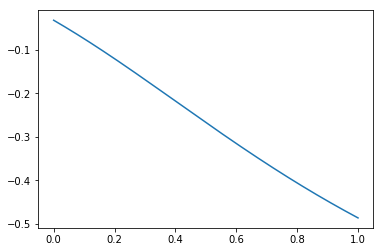

In [134]:
plt.plot(x,model.predict(x))

In [69]:
def c(i):
    return model.get_weights()[0].flatten()[i]
def r2(x,i): 
    return (x-c(i))**2
def a(i):
    return model.get_weights()[1].flatten()[i]
def H(x,i):
    return (x-c(i))*np.sqrt(r2(x,i)+a(i)**2)/2+(r2(x,i)-(x-c(i))**2+a(i)**2)/2*np.log((x-c(i))+np.sqrt(r2(x,i)+a(i)**2))
def u(x):
    return np.dot(H(x,np.arange(100)),model.get_weights()[2].flatten())
ufunc = np.vectorize(u)

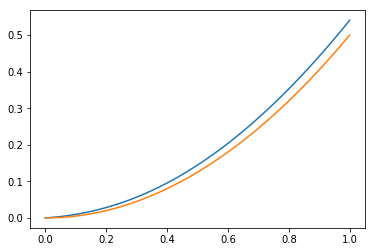

In [7]:
plt.plot(np.linspace(0,1,100),ufunc(np.linspace(0,1,100))-u(0.0))
plt.plot(np.linspace(0,1,100),0.5*np.linspace(0,1,100)**2)

# ODE - Example 2

$$ $$

In [8]:
x = np.linspace(0,1,1000)
y = np.pi*(3*np.cos(6*np.pi*x)-np.cos(2*np.pi*x))

In [12]:
model = Sequential()
rbflayer = RBFLayer(100,
                    betas=1.0,
                    input_shape=(1,))
model.add(rbflayer)
model.add(Dense(1))

model.compile(loss='mean_squared_error',optimizer='adam')

model.fit(x, y,
          batch_size=50,
          epochs=2000,
          verbose=1)

Epoch 1/2000
1000/1000 [==============================] - 0s 380us/step - loss: 50.0581
Epoch 2/2000
1000/1000 [==============================] - 0s 26us/step - loss: 49.3792
Epoch 3/2000
1000/1000 [==============================] - 0s 26us/step - loss: 49.3717
Epoch 4/2000
1000/1000 [==============================] - 0s 24us/step - loss: 49.3948
Epoch 5/2000
1000/1000 [==============================] - 0s 27us/step - loss: 49.6475
Epoch 6/2000
1000/1000 [==============================] - 0s 24us/step - loss: 49.3087
Epoch 7/2000
1000/1000 [==============================] - 0s 25us/step - loss: 49.4238
Epoch 8/2000
1000/1000 [==============================] - 0s 24us/step - loss: 49.2935
Epoch 9/2000
1000/1000 [==============================] - 0s 27us/step - loss: 49.2725
Epoch 10/2000
1000/1000 [==============================] - 0s 26us/step - loss: 49.3108
Epoch 11/2000
1000/1000 [==============================] - 0s 32us/step - loss: 49.2749
Epoch 12/2000
1000/1000 [===============

1000/1000 [==============================] - 0s 22us/step - loss: 48.9600
Epoch 94/2000
1000/1000 [==============================] - 0s 20us/step - loss: 48.9128
Epoch 95/2000
1000/1000 [==============================] - 0s 24us/step - loss: 48.9208
Epoch 96/2000
1000/1000 [==============================] - 0s 23us/step - loss: 48.9584
Epoch 97/2000
1000/1000 [==============================] - 0s 24us/step - loss: 48.9498
Epoch 98/2000
1000/1000 [==============================] - 0s 20us/step - loss: 48.8752
Epoch 99/2000
1000/1000 [==============================] - 0s 19us/step - loss: 48.8877
Epoch 100/2000
1000/1000 [==============================] - 0s 19us/step - loss: 48.9289
Epoch 101/2000
1000/1000 [==============================] - 0s 26us/step - loss: 48.8832
Epoch 102/2000
1000/1000 [==============================] - 0s 21us/step - loss: 48.9187
Epoch 103/2000
1000/1000 [==============================] - 0s 23us/step - loss: 49.0473
Epoch 104/2000
1000/1000 [================

1000/1000 [==============================] - 0s 23us/step - loss: 48.1962
Epoch 186/2000
1000/1000 [==============================] - 0s 27us/step - loss: 48.2359
Epoch 187/2000
1000/1000 [==============================] - 0s 26us/step - loss: 48.2226
Epoch 188/2000
1000/1000 [==============================] - 0s 26us/step - loss: 48.2252
Epoch 189/2000
1000/1000 [==============================] - 0s 23us/step - loss: 48.1202
Epoch 190/2000
1000/1000 [==============================] - 0s 24us/step - loss: 48.1478
Epoch 191/2000
1000/1000 [==============================] - 0s 22us/step - loss: 48.1046
Epoch 192/2000
1000/1000 [==============================] - 0s 19us/step - loss: 48.1385
Epoch 193/2000
1000/1000 [==============================] - 0s 23us/step - loss: 48.0979
Epoch 194/2000
1000/1000 [==============================] - 0s 23us/step - loss: 48.1147
Epoch 195/2000
1000/1000 [==============================] - 0s 23us/step - loss: 48.0375
Epoch 196/2000
1000/1000 [==========

1000/1000 [==============================] - 0s 24us/step - loss: 46.6964
Epoch 278/2000
1000/1000 [==============================] - 0s 23us/step - loss: 46.7073
Epoch 279/2000
1000/1000 [==============================] - 0s 26us/step - loss: 46.7170
Epoch 280/2000
1000/1000 [==============================] - 0s 22us/step - loss: 46.7404
Epoch 281/2000
1000/1000 [==============================] - 0s 24us/step - loss: 46.6982
Epoch 282/2000
1000/1000 [==============================] - 0s 29us/step - loss: 46.8031
Epoch 283/2000
1000/1000 [==============================] - 0s 32us/step - loss: 46.6211
Epoch 284/2000
1000/1000 [==============================] - 0s 29us/step - loss: 46.6173
Epoch 285/2000
1000/1000 [==============================] - 0s 26us/step - loss: 46.6092
Epoch 286/2000
1000/1000 [==============================] - 0s 26us/step - loss: 46.6206
Epoch 287/2000
1000/1000 [==============================] - 0s 25us/step - loss: 46.6064
Epoch 288/2000
1000/1000 [==========

1000/1000 [==============================] - 0s 23us/step - loss: 46.0860
Epoch 370/2000
1000/1000 [==============================] - 0s 25us/step - loss: 46.1491
Epoch 371/2000
1000/1000 [==============================] - 0s 25us/step - loss: 46.1270
Epoch 372/2000
1000/1000 [==============================] - 0s 22us/step - loss: 46.1155
Epoch 373/2000
1000/1000 [==============================] - 0s 22us/step - loss: 46.1405
Epoch 374/2000
1000/1000 [==============================] - 0s 22us/step - loss: 46.1263
Epoch 375/2000
1000/1000 [==============================] - 0s 19us/step - loss: 46.1086
Epoch 376/2000
1000/1000 [==============================] - 0s 20us/step - loss: 46.0900
Epoch 377/2000
1000/1000 [==============================] - 0s 22us/step - loss: 46.1515
Epoch 378/2000
1000/1000 [==============================] - 0s 23us/step - loss: 46.1033
Epoch 379/2000
1000/1000 [==============================] - 0s 26us/step - loss: 46.0892
Epoch 380/2000
1000/1000 [==========

1000/1000 [==============================] - 0s 26us/step - loss: 45.7426
Epoch 462/2000
1000/1000 [==============================] - 0s 26us/step - loss: 45.7381
Epoch 463/2000
1000/1000 [==============================] - 0s 24us/step - loss: 45.7726
Epoch 464/2000
1000/1000 [==============================] - 0s 22us/step - loss: 45.7684
Epoch 465/2000
1000/1000 [==============================] - 0s 20us/step - loss: 45.7418
Epoch 466/2000
1000/1000 [==============================] - 0s 23us/step - loss: 45.7439
Epoch 467/2000
1000/1000 [==============================] - 0s 23us/step - loss: 45.7156
Epoch 468/2000
1000/1000 [==============================] - 0s 24us/step - loss: 45.7096
Epoch 469/2000
1000/1000 [==============================] - ETA: 0s - loss: 46.25 - 0s 20us/step - loss: 45.7083
Epoch 470/2000
1000/1000 [==============================] - 0s 24us/step - loss: 45.7731
Epoch 471/2000
1000/1000 [==============================] - 0s 22us/step - loss: 45.7459
Epoch 472/20

Epoch 553/2000
1000/1000 [==============================] - 0s 22us/step - loss: 45.4310
Epoch 554/2000
1000/1000 [==============================] - 0s 23us/step - loss: 45.4730
Epoch 555/2000
1000/1000 [==============================] - 0s 24us/step - loss: 45.3938
Epoch 556/2000
1000/1000 [==============================] - 0s 21us/step - loss: 45.3760
Epoch 557/2000
1000/1000 [==============================] - 0s 25us/step - loss: 45.4099
Epoch 558/2000
1000/1000 [==============================] - 0s 26us/step - loss: 45.3899
Epoch 559/2000
1000/1000 [==============================] - 0s 25us/step - loss: 45.4075
Epoch 560/2000
1000/1000 [==============================] - 0s 25us/step - loss: 45.3618
Epoch 561/2000
1000/1000 [==============================] - 0s 29us/step - loss: 45.3484
Epoch 562/2000
1000/1000 [==============================] - 0s 24us/step - loss: 45.3639
Epoch 563/2000
1000/1000 [==============================] - 0s 21us/step - loss: 45.3517
Epoch 564/2000
1000/1

1000/1000 [==============================] - 0s 21us/step - loss: 45.1495
Epoch 646/2000
1000/1000 [==============================] - 0s 22us/step - loss: 45.0902
Epoch 647/2000
1000/1000 [==============================] - 0s 32us/step - loss: 45.1155
Epoch 648/2000
1000/1000 [==============================] - 0s 20us/step - loss: 45.0904
Epoch 649/2000
1000/1000 [==============================] - 0s 21us/step - loss: 45.0996
Epoch 650/2000
1000/1000 [==============================] - 0s 22us/step - loss: 45.1109
Epoch 651/2000
1000/1000 [==============================] - 0s 20us/step - loss: 45.1209
Epoch 652/2000
1000/1000 [==============================] - 0s 21us/step - loss: 45.1014
Epoch 653/2000
1000/1000 [==============================] - 0s 20us/step - loss: 45.1520
Epoch 654/2000
1000/1000 [==============================] - 0s 20us/step - loss: 45.0820
Epoch 655/2000
1000/1000 [==============================] - 0s 25us/step - loss: 45.1052
Epoch 656/2000
1000/1000 [==========

1000/1000 [==============================] - 0s 21us/step - loss: 44.8089
Epoch 738/2000
1000/1000 [==============================] - 0s 20us/step - loss: 44.8155
Epoch 739/2000
1000/1000 [==============================] - 0s 24us/step - loss: 44.8117
Epoch 740/2000
1000/1000 [==============================] - 0s 22us/step - loss: 44.7939
Epoch 741/2000
1000/1000 [==============================] - 0s 21us/step - loss: 44.8029
Epoch 742/2000
1000/1000 [==============================] - 0s 21us/step - loss: 44.8071
Epoch 743/2000
1000/1000 [==============================] - 0s 21us/step - loss: 44.7602
Epoch 744/2000
1000/1000 [==============================] - 0s 21us/step - loss: 44.7614
Epoch 745/2000
1000/1000 [==============================] - 0s 22us/step - loss: 44.8018
Epoch 746/2000
1000/1000 [==============================] - 0s 22us/step - loss: 44.8693
Epoch 747/2000
1000/1000 [==============================] - 0s 20us/step - loss: 44.7604
Epoch 748/2000
1000/1000 [==========

1000/1000 [==============================] - 0s 25us/step - loss: 44.5574
Epoch 830/2000
1000/1000 [==============================] - 0s 23us/step - loss: 44.4869
Epoch 831/2000
1000/1000 [==============================] - 0s 25us/step - loss: 44.4853
Epoch 832/2000
1000/1000 [==============================] - 0s 21us/step - loss: 44.4682
Epoch 833/2000
1000/1000 [==============================] - 0s 20us/step - loss: 44.4737
Epoch 834/2000
1000/1000 [==============================] - 0s 20us/step - loss: 44.5020
Epoch 835/2000
1000/1000 [==============================] - 0s 21us/step - loss: 44.4896
Epoch 836/2000
1000/1000 [==============================] - 0s 20us/step - loss: 44.4396
Epoch 837/2000
1000/1000 [==============================] - 0s 22us/step - loss: 44.4964
Epoch 838/2000
1000/1000 [==============================] - 0s 22us/step - loss: 44.4478
Epoch 839/2000
1000/1000 [==============================] - 0s 22us/step - loss: 44.4570
Epoch 840/2000
1000/1000 [==========

1000/1000 [==============================] - 0s 24us/step - loss: 44.1440
Epoch 922/2000
1000/1000 [==============================] - 0s 20us/step - loss: 44.1422
Epoch 923/2000
1000/1000 [==============================] - 0s 23us/step - loss: 44.1561
Epoch 924/2000
1000/1000 [==============================] - 0s 21us/step - loss: 44.1330
Epoch 925/2000
1000/1000 [==============================] - 0s 22us/step - loss: 44.1468
Epoch 926/2000
1000/1000 [==============================] - 0s 25us/step - loss: 44.1979
Epoch 927/2000
1000/1000 [==============================] - 0s 25us/step - loss: 44.1646
Epoch 928/2000
1000/1000 [==============================] - 0s 25us/step - loss: 44.1675
Epoch 929/2000
1000/1000 [==============================] - 0s 25us/step - loss: 44.1077
Epoch 930/2000
1000/1000 [==============================] - 0s 25us/step - loss: 44.1407
Epoch 931/2000
1000/1000 [==============================] - 0s 23us/step - loss: 44.0891
Epoch 932/2000
1000/1000 [==========

1000/1000 [==============================] - 0s 23us/step - loss: 43.7789
Epoch 1014/2000
1000/1000 [==============================] - 0s 25us/step - loss: 43.7141
Epoch 1015/2000
1000/1000 [==============================] - 0s 24us/step - loss: 43.7316
Epoch 1016/2000
1000/1000 [==============================] - 0s 22us/step - loss: 43.7041
Epoch 1017/2000
1000/1000 [==============================] - 0s 22us/step - loss: 43.7195
Epoch 1018/2000
1000/1000 [==============================] - 0s 22us/step - loss: 43.7070
Epoch 1019/2000
1000/1000 [==============================] - 0s 23us/step - loss: 43.6741
Epoch 1020/2000
1000/1000 [==============================] - 0s 23us/step - loss: 43.6654
Epoch 1021/2000
1000/1000 [==============================] - 0s 23us/step - loss: 43.6695
Epoch 1022/2000
1000/1000 [==============================] - 0s 20us/step - loss: 43.6696
Epoch 1023/2000
1000/1000 [==============================] - 0s 23us/step - loss: 43.7407
Epoch 1024/2000
1000/1000 

Epoch 1104/2000
1000/1000 [==============================] - 0s 27us/step - loss: 42.8871
Epoch 1105/2000
1000/1000 [==============================] - 0s 27us/step - loss: 42.8571
Epoch 1106/2000
1000/1000 [==============================] - 0s 23us/step - loss: 42.8817
Epoch 1107/2000
1000/1000 [==============================] - 0s 22us/step - loss: 42.8670
Epoch 1108/2000
1000/1000 [==============================] - 0s 22us/step - loss: 42.8630
Epoch 1109/2000
1000/1000 [==============================] - 0s 22us/step - loss: 42.8438
Epoch 1110/2000
1000/1000 [==============================] - 0s 22us/step - loss: 42.8288
Epoch 1111/2000
1000/1000 [==============================] - 0s 21us/step - loss: 42.8332
Epoch 1112/2000
1000/1000 [==============================] - 0s 21us/step - loss: 42.8119
Epoch 1113/2000
1000/1000 [==============================] - 0s 23us/step - loss: 42.8637
Epoch 1114/2000
1000/1000 [==============================] - 0s 26us/step - loss: 42.8779
Epoch 1115

1000/1000 [==============================] - 0s 26us/step - loss: 41.9482
Epoch 1195/2000
1000/1000 [==============================] - 0s 21us/step - loss: 41.8444
Epoch 1196/2000
1000/1000 [==============================] - 0s 24us/step - loss: 41.8787
Epoch 1197/2000
1000/1000 [==============================] - 0s 21us/step - loss: 41.7996
Epoch 1198/2000
1000/1000 [==============================] - 0s 20us/step - loss: 41.8082
Epoch 1199/2000
1000/1000 [==============================] - 0s 21us/step - loss: 41.8071
Epoch 1200/2000
1000/1000 [==============================] - 0s 22us/step - loss: 41.7803
Epoch 1201/2000
1000/1000 [==============================] - 0s 31us/step - loss: 41.7829
Epoch 1202/2000
1000/1000 [==============================] - 0s 27us/step - loss: 41.7423
Epoch 1203/2000
1000/1000 [==============================] - 0s 26us/step - loss: 41.7591
Epoch 1204/2000
1000/1000 [==============================] - 0s 27us/step - loss: 41.8192
Epoch 1205/2000
1000/1000 

1000/1000 [==============================] - 0s 29us/step - loss: 40.5861
Epoch 1286/2000
1000/1000 [==============================] - 0s 25us/step - loss: 40.4878
Epoch 1287/2000
1000/1000 [==============================] - 0s 21us/step - loss: 40.5500
Epoch 1288/2000
1000/1000 [==============================] - 0s 20us/step - loss: 40.5454
Epoch 1289/2000
1000/1000 [==============================] - 0s 21us/step - loss: 40.4818
Epoch 1290/2000
1000/1000 [==============================] - 0s 20us/step - loss: 40.4118
Epoch 1291/2000
1000/1000 [==============================] - 0s 21us/step - loss: 40.4652
Epoch 1292/2000
1000/1000 [==============================] - 0s 20us/step - loss: 40.3786
Epoch 1293/2000
1000/1000 [==============================] - 0s 21us/step - loss: 40.3805
Epoch 1294/2000
1000/1000 [==============================] - 0s 20us/step - loss: 40.3380
Epoch 1295/2000
1000/1000 [==============================] - 0s 19us/step - loss: 40.3503
Epoch 1296/2000
1000/1000 

1000/1000 [==============================] - 0s 26us/step - loss: 39.1345
Epoch 1377/2000
1000/1000 [==============================] - 0s 31us/step - loss: 39.0861
Epoch 1378/2000
1000/1000 [==============================] - 0s 29us/step - loss: 39.0802
Epoch 1379/2000
1000/1000 [==============================] - 0s 31us/step - loss: 39.0127
Epoch 1380/2000
1000/1000 [==============================] - 0s 24us/step - loss: 39.0501
Epoch 1381/2000
1000/1000 [==============================] - 0s 26us/step - loss: 39.0243
Epoch 1382/2000
1000/1000 [==============================] - 0s 22us/step - loss: 38.9981
Epoch 1383/2000
1000/1000 [==============================] - 0s 22us/step - loss: 38.9504
Epoch 1384/2000
1000/1000 [==============================] - 0s 26us/step - loss: 38.9268
Epoch 1385/2000
1000/1000 [==============================] - 0s 22us/step - loss: 38.9053
Epoch 1386/2000
1000/1000 [==============================] - 0s 22us/step - loss: 38.8775
Epoch 1387/2000
1000/1000 

1000/1000 [==============================] - 0s 23us/step - loss: 37.4504
Epoch 1468/2000
1000/1000 [==============================] - 0s 23us/step - loss: 37.5441
Epoch 1469/2000
1000/1000 [==============================] - 0s 20us/step - loss: 37.4101
Epoch 1470/2000
1000/1000 [==============================] - 0s 21us/step - loss: 37.4274
Epoch 1471/2000
1000/1000 [==============================] - 0s 25us/step - loss: 37.3728
Epoch 1472/2000
1000/1000 [==============================] - 0s 28us/step - loss: 37.3502
Epoch 1473/2000
1000/1000 [==============================] - 0s 28us/step - loss: 37.3492
Epoch 1474/2000
1000/1000 [==============================] - 0s 27us/step - loss: 37.4094
Epoch 1475/2000
1000/1000 [==============================] - 0s 27us/step - loss: 37.2967
Epoch 1476/2000
1000/1000 [==============================] - 0s 27us/step - loss: 37.3847
Epoch 1477/2000
1000/1000 [==============================] - 0s 28us/step - loss: 37.3513
Epoch 1478/2000
1000/1000 

Epoch 1558/2000
1000/1000 [==============================] - 0s 23us/step - loss: 35.8960
Epoch 1559/2000
1000/1000 [==============================] - 0s 26us/step - loss: 35.9221
Epoch 1560/2000
1000/1000 [==============================] - 0s 21us/step - loss: 35.8526
Epoch 1561/2000
1000/1000 [==============================] - 0s 24us/step - loss: 35.8405
Epoch 1562/2000
1000/1000 [==============================] - 0s 22us/step - loss: 35.8565
Epoch 1563/2000
1000/1000 [==============================] - 0s 22us/step - loss: 35.8569
Epoch 1564/2000
1000/1000 [==============================] - 0s 22us/step - loss: 35.7893
Epoch 1565/2000
1000/1000 [==============================] - 0s 24us/step - loss: 35.7980
Epoch 1566/2000
1000/1000 [==============================] - 0s 20us/step - loss: 35.7573
Epoch 1567/2000
1000/1000 [==============================] - 0s 23us/step - loss: 35.7386
Epoch 1568/2000
1000/1000 [==============================] - 0s 22us/step - loss: 35.7319
Epoch 1569

1000/1000 [==============================] - 0s 28us/step - loss: 34.4229
Epoch 1650/2000
1000/1000 [==============================] - 0s 24us/step - loss: 34.3432
Epoch 1651/2000
1000/1000 [==============================] - 0s 23us/step - loss: 34.3483
Epoch 1652/2000
1000/1000 [==============================] - 0s 20us/step - loss: 34.3481
Epoch 1653/2000
1000/1000 [==============================] - 0s 22us/step - loss: 34.3463
Epoch 1654/2000
1000/1000 [==============================] - 0s 20us/step - loss: 34.3081
Epoch 1655/2000
1000/1000 [==============================] - 0s 21us/step - loss: 34.3420
Epoch 1656/2000
1000/1000 [==============================] - 0s 21us/step - loss: 34.3049
Epoch 1657/2000
1000/1000 [==============================] - 0s 20us/step - loss: 34.2485
Epoch 1658/2000
1000/1000 [==============================] - 0s 21us/step - loss: 34.2885
Epoch 1659/2000
1000/1000 [==============================] - 0s 21us/step - loss: 34.2669
Epoch 1660/2000
1000/1000 

1000/1000 [==============================] - 0s 21us/step - loss: 33.0160
Epoch 1741/2000
1000/1000 [==============================] - 0s 23us/step - loss: 32.8716
Epoch 1742/2000
1000/1000 [==============================] - 0s 25us/step - loss: 32.9134
Epoch 1743/2000
1000/1000 [==============================] - 0s 22us/step - loss: 32.9205
Epoch 1744/2000
1000/1000 [==============================] - 0s 21us/step - loss: 32.8738
Epoch 1745/2000
1000/1000 [==============================] - 0s 20us/step - loss: 32.8888
Epoch 1746/2000
1000/1000 [==============================] - 0s 23us/step - loss: 32.8304
Epoch 1747/2000
1000/1000 [==============================] - 0s 22us/step - loss: 32.8522
Epoch 1748/2000
1000/1000 [==============================] - 0s 24us/step - loss: 32.8521
Epoch 1749/2000
1000/1000 [==============================] - 0s 26us/step - loss: 32.7796
Epoch 1750/2000
1000/1000 [==============================] - 0s 28us/step - loss: 32.7714
Epoch 1751/2000
1000/1000 

1000/1000 [==============================] - 0s 27us/step - loss: 31.4787
Epoch 1832/2000
1000/1000 [==============================] - 0s 29us/step - loss: 31.4794
Epoch 1833/2000
1000/1000 [==============================] - 0s 20us/step - loss: 31.5081
Epoch 1834/2000
1000/1000 [==============================] - 0s 20us/step - loss: 31.4851
Epoch 1835/2000
1000/1000 [==============================] - 0s 20us/step - loss: 31.3974
Epoch 1836/2000
1000/1000 [==============================] - 0s 21us/step - loss: 31.3520
Epoch 1837/2000
1000/1000 [==============================] - 0s 20us/step - loss: 31.3745
Epoch 1838/2000
1000/1000 [==============================] - 0s 20us/step - loss: 31.3441
Epoch 1839/2000
1000/1000 [==============================] - 0s 26us/step - loss: 31.3894
Epoch 1840/2000
1000/1000 [==============================] - 0s 20us/step - loss: 31.3752
Epoch 1841/2000
1000/1000 [==============================] - 0s 21us/step - loss: 31.4641
Epoch 1842/2000
1000/1000 

1000/1000 [==============================] - 0s 26us/step - loss: 29.9303
Epoch 1923/2000
1000/1000 [==============================] - 0s 25us/step - loss: 29.9335
Epoch 1924/2000
1000/1000 [==============================] - 0s 26us/step - loss: 29.9861
Epoch 1925/2000
1000/1000 [==============================] - 0s 24us/step - loss: 29.9521
Epoch 1926/2000
1000/1000 [==============================] - 0s 22us/step - loss: 29.8868
Epoch 1927/2000
1000/1000 [==============================] - 0s 23us/step - loss: 29.9139
Epoch 1928/2000
1000/1000 [==============================] - 0s 24us/step - loss: 29.8622
Epoch 1929/2000
1000/1000 [==============================] - 0s 20us/step - loss: 29.8624
Epoch 1930/2000
1000/1000 [==============================] - 0s 21us/step - loss: 29.8531
Epoch 1931/2000
1000/1000 [==============================] - 0s 22us/step - loss: 29.8126
Epoch 1932/2000
1000/1000 [==============================] - 0s 21us/step - loss: 29.7918
Epoch 1933/2000
1000/1000 

In [32]:
model.fit(x, y,
          batch_size=50,
          epochs=200,
          verbose=1)

Epoch 1/200
1000/1000 [==============================] - 0s 24us/step - loss: 0.2524
Epoch 2/200
1000/1000 [==============================] - 0s 30us/step - loss: 0.2502
Epoch 3/200
1000/1000 [==============================] - 0s 28us/step - loss: 0.2498
Epoch 4/200
1000/1000 [==============================] - 0s 27us/step - loss: 0.2488
Epoch 5/200
1000/1000 [==============================] - 0s 26us/step - loss: 0.2540
Epoch 6/200
1000/1000 [==============================] - 0s 25us/step - loss: 0.2615
Epoch 7/200
1000/1000 [==============================] - 0s 28us/step - loss: 0.2572
Epoch 8/200
1000/1000 [==============================] - 0s 25us/step - loss: 0.2474
Epoch 9/200
1000/1000 [==============================] - 0s 22us/step - loss: 0.2555
Epoch 10/200
1000/1000 [==============================] - 0s 22us/step - loss: 0.2548
Epoch 11/200
1000/1000 [==============================] - 0s 23us/step - loss: 0.2580
Epoch 12/200
1000/1000 [==============================] - 0s 24

1000/1000 [==============================] - 0s 25us/step - loss: 0.2585
Epoch 97/200
1000/1000 [==============================] - 0s 25us/step - loss: 0.2430
Epoch 98/200
1000/1000 [==============================] - 0s 26us/step - loss: 0.2423
Epoch 99/200
1000/1000 [==============================] - 0s 26us/step - loss: 0.2660
Epoch 100/200
1000/1000 [==============================] - 0s 24us/step - loss: 0.2489
Epoch 101/200
1000/1000 [==============================] - 0s 23us/step - loss: 0.2515
Epoch 102/200
1000/1000 [==============================] - 0s 22us/step - loss: 0.2565
Epoch 103/200
1000/1000 [==============================] - 0s 23us/step - loss: 0.2556
Epoch 104/200
1000/1000 [==============================] - 0s 21us/step - loss: 0.2485
Epoch 105/200
1000/1000 [==============================] - 0s 27us/step - loss: 0.2415
Epoch 106/200
1000/1000 [==============================] - 0s 21us/step - loss: 0.2430
Epoch 107/200
1000/1000 [==============================] - 0

1000/1000 [==============================] - 0s 26us/step - loss: 0.2550
Epoch 191/200
1000/1000 [==============================] - 0s 25us/step - loss: 0.2818
Epoch 192/200
1000/1000 [==============================] - 0s 27us/step - loss: 0.2329
Epoch 193/200
1000/1000 [==============================] - 0s 25us/step - loss: 0.2311
Epoch 194/200
1000/1000 [==============================] - 0s 23us/step - loss: 0.2398
Epoch 195/200
1000/1000 [==============================] - 0s 24us/step - loss: 0.2324
Epoch 196/200
1000/1000 [==============================] - 0s 23us/step - loss: 0.2413
Epoch 197/200
1000/1000 [==============================] - 0s 22us/step - loss: 0.2567
Epoch 198/200
1000/1000 [==============================] - 0s 19us/step - loss: 0.2515
Epoch 199/200
1000/1000 [==============================] - 0s 21us/step - loss: 0.2508
Epoch 200/200
1000/1000 [==============================] - 0s 25us/step - loss: 0.2518


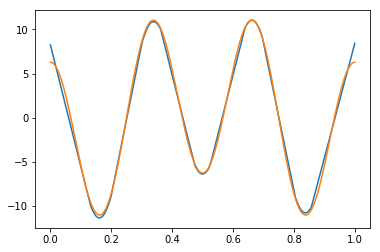

In [33]:
plt.plot(x,model.predict(x))
plt.plot(x,y)

In [35]:
def c(i):
    return model.get_weights()[0].flatten()[i]
def r2(x,i): 
    return (x-c(i))**2
def a(i):
    return model.get_weights()[1].flatten()[i]
def H(x,i):
    return (x-c(i))*np.sqrt(r2(x,i)+a(i)**2)/2+(r2(x,i)-(x-c(i))**2+a(i)**2)/2*np.log((x-c(i))+np.sqrt(r2(x,i)+a(i)**2))
def u(x):
    return np.dot(H(x,np.arange(100)),model.get_weights()[2].flatten())
ufunc = np.vectorize(u)

C:\Users\Freek\Anaconda3\lib\site-packages\ipykernel_launcher.py:8: RuntimeWarning: divide by zero encountered in log
  


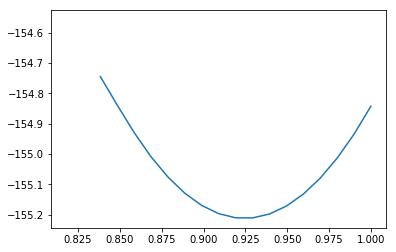

In [36]:
plt.plot(np.linspace(0,1,100),ufunc(np.linspace(0,1,100)))

# PDE

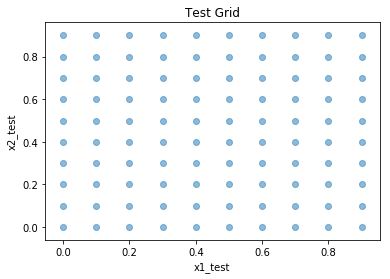

In [755]:
x = np.arange(0.0,1.0,0.1) 
x1_test = np.repeat(x,10)
x2_test = np.tile(x,10)
labels = np.zeros(100) 

# Plot
plt.scatter(x1_test, x2_test,alpha=0.5)
plt.title('Test Grid')
plt.xlabel('x1_test')
plt.ylabel('x2_test')
plt.show()

In [799]:
def gradient( y, x , give_name):
    return Lambda( lambda z: K.gradients( z[0], z[1] ), output_shape = [1], name = give_name)( [ y, x ] )

x1=Input(shape=(1,))
x2=Input(shape=(1,))
xin = concatenate([x1,x2])
rbflayer = RBFLayer(1000, betas=2.0, input_shape=(2,))(xin)
y = Dense(1, name="out", activation='sigmoid')(rbflayer)
g1 = gradient( y, x1 , "dudx1")
g11 = gradient( g1,x1,"dudxx1")
g2 = gradient( y, x2 , "dudx2")
g22 = gradient( g2,x2,"dudxx2")
loss = Add(name = "loss")([g22,g11]) #loss is Laplacian(u) = 0 with u(0) = 0

model = Model(inputs=[x1,x2],outputs=[y,g1,g11,g2,g22,loss])

losses = {
	"loss": "mean_squared_error",
}

model.compile(loss=losses, optimizer='adam', metrics=['accuracy'])

# model.compile(loss=losses, optimizer='adam', metrics=['accuracy'])

# model = Model( inputs = [ x1, x2, BC], outputs = [a,f,j] )
# pre_ans = model.predict( [x1_test, x2_test, BC_test], steps = 1 )

C:\Users\Freek\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Output "out" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "out" during training.
C:\Users\Freek\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Output "dudx1" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "dudx1" during training.
C:\Users\Freek\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Output "dudxx1" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "dudxx1" during training.
C:\Users\Freek\Anaconda3\lib\site-packages\ipykernel_launcher.py:21: UserWarning: Output "dudx2" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "dudx2" during training.
C:\Users\Freek\Anaconda3\lib\site-

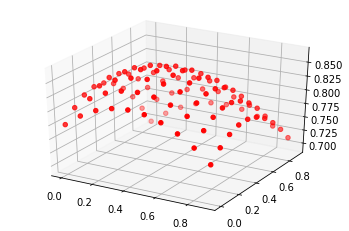

In [800]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1_test, x2_test, model.predict([x1_test,x2_test])[0], c='r', marker='o')

In [801]:
model.fit([x1_test,x2_test],labels,epochs=100,verbose=0)

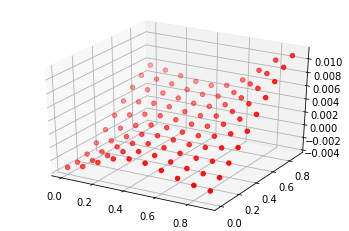

In [802]:
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(x1_test, x2_test, model.predict([x1_test,x2_test])[1], c='r', marker='o')

# Graveyard

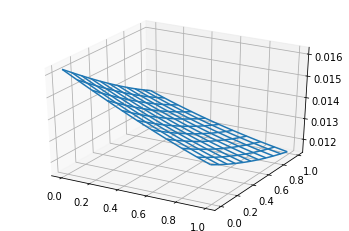

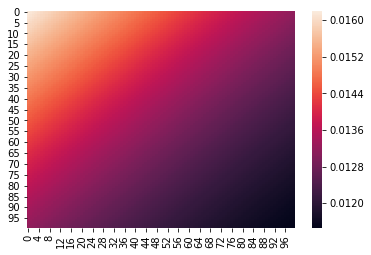

In [489]:
u = pre_ans[0].reshape(100,100)
grad = pre_ans[1].reshape(100,100)

from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

x1plot=np.tile(np.arange(0.0,1.0,0.01) ,(100,1))
x2plot=np.transpose(x1plot)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(x1plot, x2plot, u, rstride=10, cstride=10)
plt.show()

ax = sns.heatmap(u)
plt.show()

In [490]:
losses = {
	"Output": "mean_squared_error",
}

model.compile(loss=losses, optimizer='adam', metrics=['accuracy'])


C:\Users\Freek\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Output "functionvalue" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "functionvalue" during training.
  """
C:\Users\Freek\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: UserWarning: Output "Laplacian" missing from loss dictionary. We assume this was done on purpose, and we will not be expecting any data to be passed to "Laplacian" during training.
  """


In [492]:
import math

# create interior points and boundary points to train on.
nexamples = 100000

#hyperparameters:
theta = 0.0 #theta proportion of interior points, (1-theta) proportion of boundary points.

#interior:
x1_interior = np.random.random((math.floor(nexamples*theta), 1))
x2_interior = np.random.random((math.floor(nexamples*theta), 1))
BC_interior = np.zeros((math.floor(nexamples*theta),1), dtype=int)
labels_interior = np.zeros((math.floor(nexamples*theta),1))

#bc: (on a rectangular grid (]0,1[x]0,1[) )
x1_data_bc1 = np.random.random((math.floor(nexamples*(1.0-theta)/4.0), 1))
x2_data_bc1 = np.zeros((math.floor(nexamples*(1.0-theta)/4.0),1))
labels_bc1 = np.zeros((math.floor(nexamples*(1.0-theta)/4.0),1))
BC_bc1 = np.ones((math.floor(nexamples*(1.0-theta)/4.0),1), dtype=int)

x1_data_bc2 = np.random.random((math.floor(nexamples*(1.0-theta)/4.0), 1))
x2_data_bc2 = np.ones((math.floor(nexamples*(1.0-theta)/4.0),1))
labels_bc2 = np.zeros((math.floor(nexamples*(1.0-theta)/4.0),1))
BC_bc2 = np.ones((math.floor(nexamples*(1.0-theta)/4.0),1), dtype=int)

x1_data_bc3 = np.zeros((math.floor(nexamples*(1.0-theta)/4.0),1))
x2_data_bc3 = np.random.random((math.floor(nexamples*(1.0-theta)/4.0), 1))
labels_bc3 = np.ones((math.floor(nexamples*(1.0-theta)/4.0),1))
BC_bc3 = np.ones((math.floor(nexamples*(1.0-theta)/4.0),1), dtype=int)

x1_data_bc4 = np.ones((math.floor(nexamples*(1.0-theta)/4.0),1))
x2_data_bc4 = np.random.random((math.floor(nexamples*(1.0-theta)/4.0), 1))
labels_bc4 = np.ones((math.floor(nexamples*(1.0-theta)/4.0),1))
BC_bc4 = np.ones((math.floor(nexamples*(1.0-theta)/4.0),1), dtype=int)

#concatenate to one dataset:
x1=np.concatenate((x1_interior, x1_data_bc1, x1_data_bc2, x1_data_bc3, x1_data_bc4), axis=0)
x2=np.concatenate((x2_interior, x2_data_bc1, x2_data_bc2, x2_data_bc3, x2_data_bc4), axis=0)
BC=np.concatenate((BC_interior, BC_bc1, BC_bc2, BC_bc3, BC_bc4), axis=0)
labels=np.concatenate((labels_interior, labels_bc1, labels_bc2, labels_bc3, labels_bc4), axis=0)
model.fit([x1,x2,BC],labels,epochs=5, batch_size=1000)

Epoch 1/5
100000/100000 [==============================] - 1s 13us/step - loss: 0.2461 - Output_loss: 0.2461 - Output_acc: 0.5525
Epoch 2/5
100000/100000 [==============================] - 1s 14us/step - loss: 0.2437 - Output_loss: 0.2437 - Output_acc: 0.5457
Epoch 3/5
100000/100000 [==============================] - 1s 14us/step - loss: 0.2405 - Output_loss: 0.2405 - Output_acc: 0.5466
Epoch 4/5
100000/100000 [==============================] - 1s 13us/step - loss: 0.2359 - Output_loss: 0.2359 - Output_acc: 0.5365
Epoch 5/5
100000/100000 [==============================] - 1s 14us/step - loss: 0.2306 - Output_loss: 0.2306 - Output_acc: 0.5531


In [493]:
model.get_weights()

[array([[2.215086  , 0.9542385 , 2.0310667 , 2.283803  , 0.9521212 ,
         2.092994  , 2.1487951 , 0.94433266, 2.274298  , 2.167483  ,
         2.2741487 , 0.92933595, 0.88841605, 0.92110157, 0.9972695 ,
         2.105451  , 0.9480173 , 0.95442486, 1.0404155 , 2.13846   ,
         0.9123835 , 2.1112497 , 1.2015921 , 2.148903  , 2.1832194 ,
         1.9629573 , 0.9456208 , 0.9459178 , 0.90308774, 0.91322654,
         2.1477091 , 1.0591432 , 0.93638027, 0.9405979 , 0.95362806,
         0.88626564, 1.8495204 , 2.0252106 , 2.2132833 , 0.91986936,
         0.9620819 , 0.89257264, 1.0568469 , 2.3123822 , 2.2163742 ,
         0.92511415, 0.9012712 , 0.9784332 , 2.1002908 , 1.0224639 ,
         0.95280164, 0.9833133 , 0.9476041 , 0.9623552 , 1.9922179 ,
         2.1098435 , 2.158587  , 1.8325146 , 1.7175994 , 0.9486288 ,
         0.9628056 , 1.9538662 , 1.9924449 , 0.9026527 , 0.934632  ,
         0.9602245 , 0.9471197 , 0.92264515, 1.9591976 , 1.3221115 ,
         0.99257267, 2.1408954 , 1

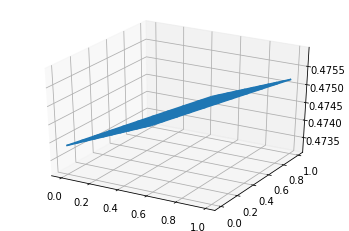

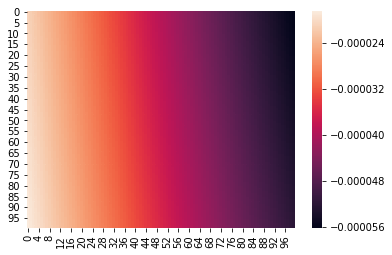

In [475]:
from mpl_toolkits.mplot3d import axes3d
import matplotlib.pyplot as plt

post_ans = model.predict( [x1_test, x2_test, BC_test], steps = 1 )
u = post_ans[0].reshape(100,100)
grad = post_ans[1].reshape(100,100)

x1plot=np.tile(np.arange(0.0,1.0,0.01) ,(100,1))
x2plot=np.transpose(x1plot)

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.plot_wireframe(x1plot, x2plot, u, rstride=10, cstride=10)
plt.show()

ax = sns.heatmap(grad)
plt.show()

In [474]:
grad

array([[-2.0844975e-05, -2.1222890e-05, -2.1600508e-05, ...,
        -5.5466371e-05, -5.5795925e-05, -5.6124820e-05],
       [-2.0821268e-05, -2.1199048e-05, -2.1576538e-05, ...,
        -5.5425389e-05, -5.5754717e-05, -5.6083394e-05],
       [-2.0797492e-05, -2.1175154e-05, -2.1552496e-05, ...,
        -5.5384313e-05, -5.5713437e-05, -5.6041907e-05],
       ...,
       [-1.8356703e-05, -1.8719762e-05, -1.9082421e-05, ...,
        -5.1182640e-05, -5.1490853e-05, -5.1798364e-05],
       [-1.8329914e-05, -1.8692795e-05, -1.9055286e-05, ...,
        -5.1136311e-05, -5.1444280e-05, -5.1751544e-05],
       [-1.8303101e-05, -1.8665824e-05, -1.9028137e-05, ...,
        -5.1089923e-05, -5.1397674e-05, -5.1704730e-05]], dtype=float32)

In [479]:
model.get_weights()

[array([[-0.07877899,  0.02857952, -0.08733317, -0.05328723,  0.03751148,
         -0.0035272 ,  0.0034011 ,  0.02036109,  0.05039605,  0.08187934,
         -0.03301309,  0.01507246,  0.03926967, -0.0054754 ,  0.06117326,
          0.01815764, -0.04515646, -0.06575437, -0.00310918, -0.06241128,
          0.12430318,  0.02359621, -0.07063328,  0.01424535, -0.02720166,
          0.00375348, -0.01004155,  0.01306699, -0.02032447,  0.01917587,
         -0.07983478,  0.03987288, -0.11372261, -0.03550596, -0.0090245 ,
         -0.05524523, -0.11351965,  0.01582579, -0.0202599 ,  0.02234505,
          0.09682925,  0.02845044, -0.0966949 , -0.08766605,  0.02089771,
         -0.0228591 ,  0.05327751,  0.01095653, -0.07718241,  0.05455405,
         -0.00654163,  0.04877005, -0.06539116,  0.04408176, -0.00896797,
          0.11418717,  0.07270329,  0.02958302, -0.03156521, -0.06067498,
          0.03608618, -0.02356444,  0.00220818,  0.0554113 ,  0.00340814,
         -0.03353201, -0.03132417, -0.